# Was beeinflusst den Verkaufspreis?

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re

from collections import Counter
import os

In [2]:
df = pd.read_csv('car_prices.csv',error_bad_lines=False,warn_bad_lines=True)
print(df) # Ausgabe 

C:\Users\Jerma\AppData\Local\Temp\ipykernel_25520\814460106.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('car_prices.csv',error_bad_lines=False,warn_bad_lines=True)
C:\Users\Jerma\AppData\Local\Temp\ipykernel_25520\814460106.py:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('car_prices.csv',error_bad_lines=False,warn_bad_lines=True)
b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expec

        year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558806  2015     Kia                 K900       Luxury      Sedan   
558807  2012     Ram                 2500  Power Wagon   Crew Cab   
558808  2012     BMW                   X5    xDrive35d        SUV   
558809  2015  Nissan               Altima        2.5 S      sedan   
558810  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer   color  \
0         automatic  5xyktca69fg566472    ca        5.0   16639.0   white   
1         automat

In [3]:
df.shape

(558811, 16)

Die Gesamtzahl der Zeilen beträgt 558 Tausend mit 16 Spalten.

In [4]:
#Die Funktion head() wird verwendet, um die ersten n Zeilen zu erhalten.
#Diese Funktion gibt die ersten n Zeilen des Objekts auf der Grundlage der Position zurück. Sie ist nützlich, um schnell zu testen, ob das Objekt die richtige Art von Daten enthält.
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
#Gibt ein Tupel zurück, das die Dimensionalität des DataFrame angibt.
(df.isnull().sum()/df.shape[0])*100

year             0.000000
make             1.843378
model            1.860915
trim             1.906011
body             2.361263
transmission    11.695010
vin              0.000000
state            0.000000
condition        2.110553
odometer         0.016821
color            0.134035
interior         0.134035
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

Betrachtet man die Nullwerte, so sind mit Ausnahme der Übertragung (11 %) alle anderen vernachlässigbar. 
Der Einfachheit halber lassen wir diese Nullwerte weg und führen unsere Analyse durch. Prüfen wir auf Duplikate,

In [6]:
df.duplicated().sum()


0

No rows are duplicated.


In [7]:
#Gibt die Datentypen im DataFrame zurück.

# Dies gibt eine Serie mit dem Datentyp jeder Spalte zurück. Der Index des Ergebnisses entspricht den Spalten des ursprünglichen DataFrame. 
# Spalten mit gemischten Typen werden mit dem Objekt dtype gespeichert.
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

Text(0, 0.5, 'Freq')

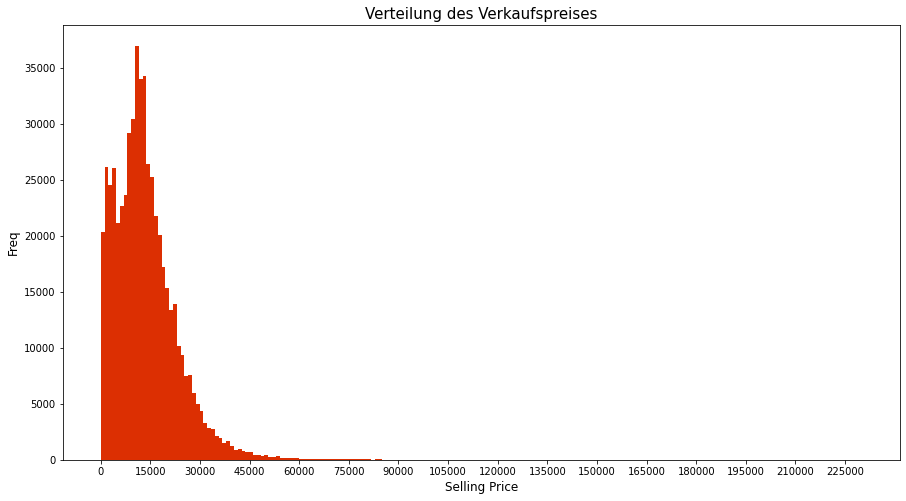

In [8]:


plt.figure(figsize=(15,8))
plt.hist(df['sellingprice'],bins=200,color='#dc2f02')
plt.title('Verteilung des Verkaufspreises',fontsize=15)
plt.xticks(np.arange(0,df['sellingprice'].max(),15000))
plt.xlabel('Selling Price',fontsize=12)
plt.ylabel('Freq',fontsize=12)

In [9]:
df['sellingprice'].describe()

count    558811.000000
mean      13611.262461
std        9749.656919
min           1.000000
25%        6900.000000
50%       12100.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64

Die Verteilung scheint schräg nach rechts zu verlaufen, wobei der Großteil der Verkaufspreise zwischen 15000 und 30000 liegt. Es gibt Ausreißer > 60000. 75 % der Daten haben einen Verkaufspreis < 200K. Ich gehe davon aus, dass es sich bei den teuersten Marken um Oldtimer oder High-End-Modelle wie Ferrari, BMW usw. handeln sollte. Das wird vielleicht klar, wenn wir dies mit der Marke vergleichen. Werfen wir einen groben Blick auf die Top-End-Marken

In [10]:
df.loc[df['sellingprice']>60000,'make'].value_counts()

BMW              338
Mercedes-Benz    306
Porsche          293
Land Rover       129
Audi              77
Lexus             67
Bentley           61
Nissan            54
Jaguar            53
Cadillac          42
Chevrolet         35
Maserati          35
Infiniti          22
Ferrari           19
Tesla             18
Rolls-Royce       17
GMC                7
Toyota             6
Ford               5
Aston Martin       4
Lamborghini        4
land rover         1
bmw                1
airstream          1
Jeep               1
Name: make, dtype: int64

Unsere Vermutung war richtig. Die Liste wird von BMW, Benz, Jaguar und Ferrari dominiert. Ein weiterer interessanter Punkt bei unserer Analyse ist die Tatsache, dass die Spalte "Marke" möglicherweise etwas bereinigt werden muss, da sich einige Marken zu wiederholen scheinen (BMW, bmw, Land Rover, land rover usw.). Der Einfachheit halber werden wir dies nicht tun und uns stattdessen auf die Gesamtanalyse konzentrieren

In [11]:
df['make'].value_counts()[:10]

Ford         93554
Chevrolet    60197
Nissan       53946
Toyota       39871
Dodge        30710
Honda        27206
Hyundai      21816
BMW          20719
Kia          18077
Chrysler     17276
Name: make, dtype: int64

In [12]:
top_make=df['make'].value_counts()[:10].index

In [13]:
top_make

Index(['Ford', 'Chevrolet', 'Nissan', 'Toyota', 'Dodge', 'Honda', 'Hyundai',
       'BMW', 'Kia', 'Chrysler'],
      dtype='object')

Da wir fast 96 Marken haben, betrachten wir nur die Top 10 und veranschaulichen ihre Verkaufspreisentwicklung.


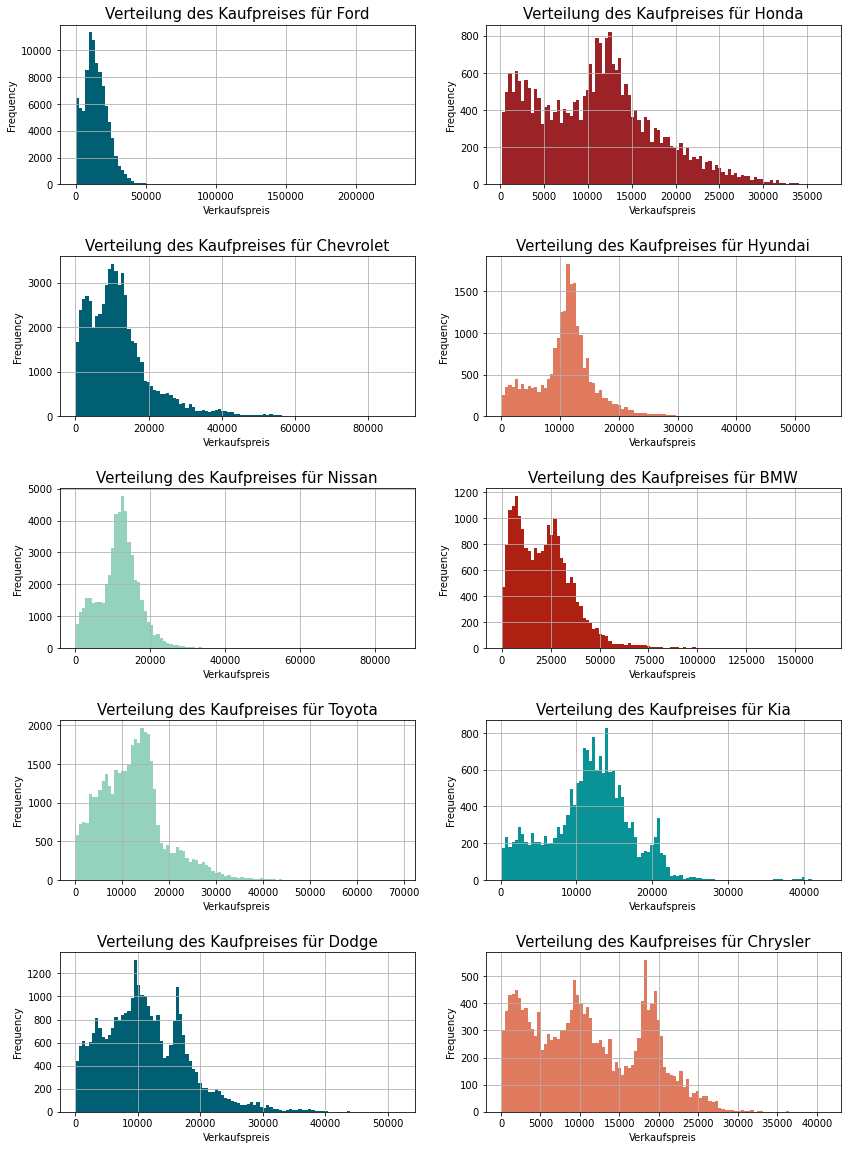

In [41]:
fig,ax=plt.subplots(5,2,figsize=(14,20))
color_list=['#0a9396','#ca6702','#ae2012','#9b2226','#001219','#005f73','#94d2bd','#e9d8a6','#e5e5e5','#e07a5f'] #coolors.co
i=0
for t in top_make:
    df.loc[df['make']==t,'sellingprice'].hist(ax=ax[i%5][i//5],bins=100,color=np.random.choice(color_list,replace=False))
    ax[i%5][i//5].set_xlabel('Verkaufspreis',fontsize=10)
    ax[i%5][i//5].set_ylabel('Frequency',fontsize=10)
    ax[i%5][i//5].set_title(f'Verteilung des Kaufpreises für {t}',fontsize=15)
    plt.subplots_adjust(hspace=0.45)
    i+=1

In [15]:
df.loc[df['make']=='Ford','sellingprice'].describe()

count     93554.00000
mean      14540.43608
std        8606.07005
min           1.00000
25%        8600.00000
50%       13500.00000
75%       19800.00000
max      230000.00000
Name: sellingprice, dtype: float64


- Die Verteilung der Top-10-Marken ist einzigartig und die Preisspanne ist unterschiedlich.
-  Von diesen scheinen Honda und Chrysler eine größere Bandbreite bei der Verteilung der Verkaufspreise zu haben.
- Der Verkaufspreis von Ford liegt eng beieinander und ist auf 50000 begrenzt. Es gibt einen Ausreißer, der in der Preisspanne oberhalb von 200.000 zu liegen scheint.
- Fast alle der 10 Marken haben Spitzenwerte um 10000. Es gibt nur wenige Marken, die bimodale Spitzenwerte aufweisen.

Eine ähnliche Analyse wie die obige kann für verschiedene Karosserietypen durchgeführt werden.

In [16]:


(df['body'].value_counts()[:10]/df.shape[0])*100



Sedan          35.689527
SUV            21.347468
sedan           7.499137
suv             4.393614
Hatchback       3.825981
Minivan         3.822938
Coupe           2.613048
Wagon           2.439107
Crew Cab        2.376474
Convertible     1.548287
Name: body, dtype: float64

Da 11 % der Gesamtdaten in dieser Spalte Null sind, werde ich sie in der Analyse entfernen.

In [17]:
trans_df=df.loc[~(df['transmission'].isna()),]
trans_df.isna().sum() ## Bestätigt, dass Nullwerte entfernt werden.

year                0
make             8540
model            8632
trim             8856
body            11032
transmission        0
vin                 0
state               0
condition        9908
odometer           63
color             595
interior          595
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [18]:
trans_df['transmission'].value_counts()

automatic    475914
manual        17544
Name: transmission, dtype: int64

Text(0, 0.5, 'Freq')

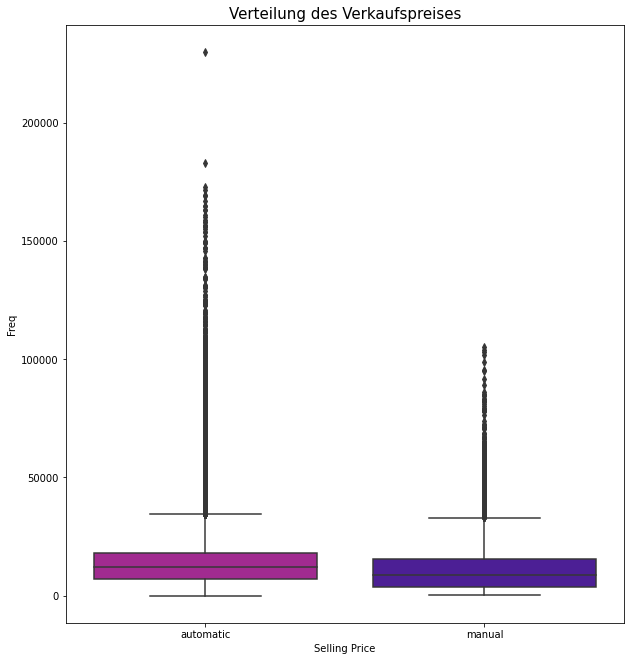

In [19]:
plt.figure(figsize=(10,11))
# plt.hist(trans_df.loc[trans_df['transmission']=='automatic','sellingprice'],color='#b5179e',alpha=0.8,label='automatic',bins=100)
# plt.hist(trans_df.loc[trans_df['transmission']=='manual','sellingprice'],color='#480ca8',alpha=0.8,label='manual',bins=100)
# plt.legend()
sns.boxplot(x='transmission',y='sellingprice',data=trans_df,palette=['#b5179e','#480ca8'])
plt.title('Verteilung des Verkaufspreises',fontsize=15)
plt.xlabel('Selling Price',fontsize=10)
plt.ylabel('Freq',fontsize=10)

Es besteht ein deutlicher Unterschied zwischen dem Getriebe und dem Verkaufstyp. Bei Fahrzeugen mit Automatikgetriebe scheint das Vorhandensein von Ausreißern eine große Rolle zu spielen. Der Median des Verkaufspreises von Fahrzeugen mit Automatikgetriebe ist höher als der von Fahrzeugen mit Schaltgetriebe.

Da wir nun die Verteilung der Verkaufspreise kennen, können wir prüfen, wie sie sich zu den Kilometerständen verhalten. Im Allgemeinen würde ich erwarten, dass der Wiederverkaufswert umso geringer ist, je höher die Nutzung (Kilometerstand) ist. 


C:\Users\Jerma\AppData\Local\Temp\ipykernel_25520\1581177395.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels);
C:\Users\Jerma\AppData\Local\Temp\ipykernel_25520\1581177395.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels);


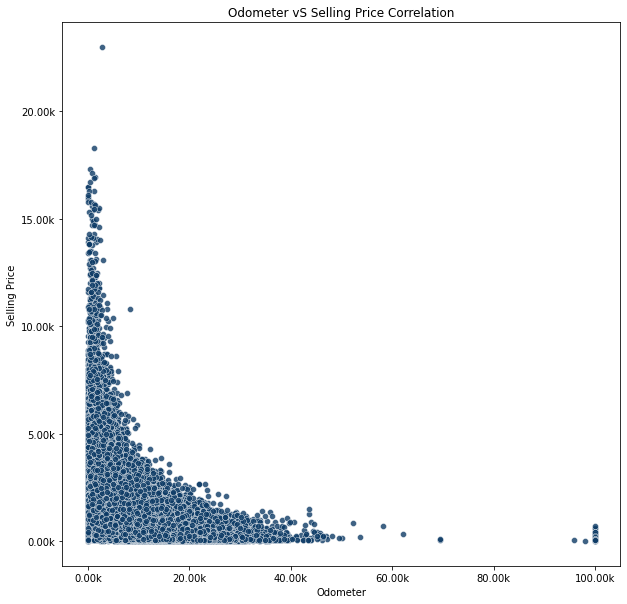

In [20]:
plt.figure(figsize=(10,10))
g=sns.scatterplot(x='odometer',y='sellingprice',data=df,color='#0d3b66',alpha=0.8)
g.set_title('Odometer vS Selling Price Correlation',fontsize=12)
g.set_xlabel('Odometer',fontsize=10)
g.set_ylabel('Selling Price',fontsize=10)
xlabels=['{:,.2f}'.format(x)+'k' for x in g.get_xticks()/10e3]
ylabels=['{:,.2f}'.format(y)+'k' for y in g.get_yticks()/10e3]
g.set_xticklabels(xlabels);
g.set_yticklabels(ylabels);

Es zeigt sich, dass der Anstieg der Kilometerstände (> 45T) zwar den Verkaufspreis der Autos gesenkt hat, dass es aber auch Autos gab, die einen niedrigeren Kilometerstand aufwiesen, deren Verkaufspreis jedoch bei > 5k lag. Wir können also davon ausgehen, dass nicht nur der Kilometerstand, sondern auch andere Faktoren wie Marke, Modell, Bundesland usw. für den Verkaufspreis von Autos ausschlaggebend sind.

# Marke & Model

Um diese Analyse durchzuführen, müssen die Nullwerte für Marke und Modell entfernt werden.


In [21]:
mod_df=df.dropna(axis=0,subset=['make','model'])
mod_df.isna().sum()

year                0
make                0
model               0
trim              350
body             2894
transmission    63586
vin                 0
state               0
condition       11707
odometer           90
color             729
interior          729
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [22]:
ma_mo=list(zip(mod_df['make'],mod_df['model']))


In [23]:
Counter(i for i in ma_mo).most_common()[:10]

[(('Nissan', 'Altima'), 19349),
 (('Ford', 'F-150'), 14479),
 (('Ford', 'Fusion'), 12946),
 (('Toyota', 'Camry'), 12545),
 (('Ford', 'Escape'), 11861),
 (('Ford', 'Focus'), 10394),
 (('Honda', 'Accord'), 9127),
 (('BMW', '3 Series'), 8204),
 (('Dodge', 'Grand Caravan'), 7941),
 (('Chevrolet', 'Impala'), 7923)]

Ford scheint die Liste der meistverkauften Autos eindeutig zu dominieren. Nissan, Chevrolet, Honda und BMW sind weitere Marken.


Text(0, 0.5, 'Freq')

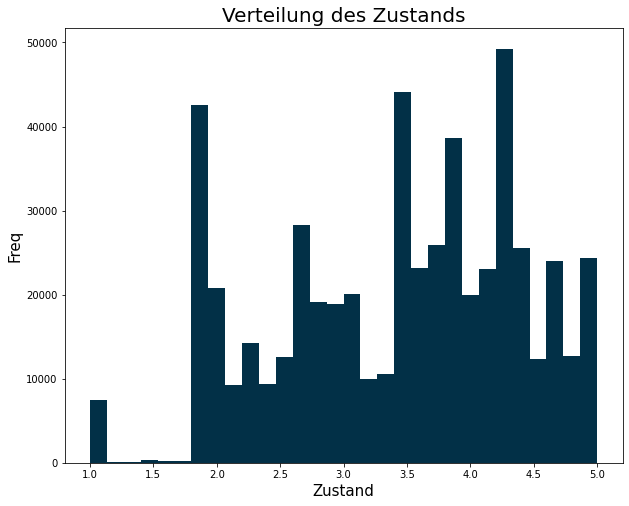

In [42]:
plt.figure(figsize=(10,8))
plt.hist(df['condition'],bins=30,color='#023047')
plt.title('Verteilung des Zustands',fontsize=20)
plt.xlabel('Zustand',fontsize=15)
plt.ylabel('Freq',fontsize=15)

Der Zustand der zu versteigernden Fahrzeuge wird zwischen 1 und 5 eingestuft. Es gibt keine eindeutige Verteilung, die sich aus dem Diagramm ableiten ließe. 45000 Autos sind in sehr gutem Zustand, und es gibt auch Autos mit den Bewertungen 1,8 und 3,5 in großer Zahl.

Lässt man die Spalte weg und ermittelt den durchschnittlichen Verkaufspreis entsteht folgendes :

In [25]:
df['condition_bin'],bins=pd.cut(df['condition'],bins=4,retbins=True)

Text(0.5, 0, 'Selling Price')

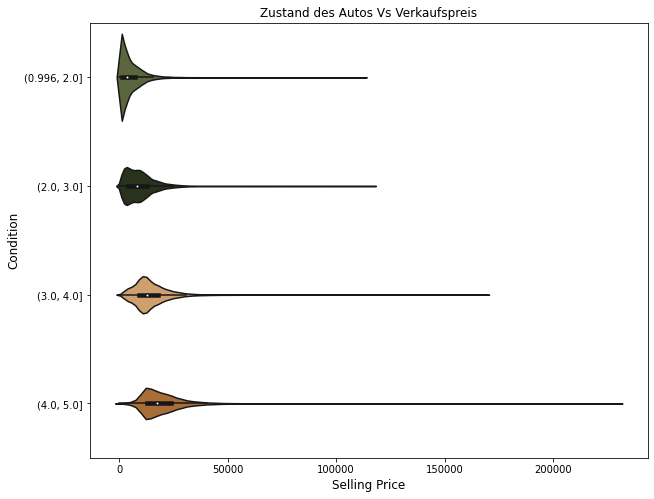

In [26]:
plt.figure(figsize=(10,8))
sns.violinplot(y=df['condition_bin'],x=df['sellingprice'],palette=['#606c38','#283618','#dda15e','#bc6c25'])
plt.title('Zustand des Autos Vs Verkaufspreis',fontsize=12)
plt.ylabel('Zustand',fontsize=12)
plt.xlabel('Verkaufspreis',fontsize=12)

Es ist deutlich zu erkennen, dass der Medianwert des Verkaufspreises mit zunehmendem Zustand der Fahrzeuge ansteigt. Wie aus den Diagrammen ersichtlich ist, werden die Bedingungen von vielen Ausreißern dominiert.

In [27]:
df['year'].min(),df['year'].max()

(1982, 2015)

Wir haben Daten von 1982 bis 2015.


Es gibt auch eine Spalte - saledate, die einige gute Informationen enthält. Bereinigen wir sie, um Wochentag, Monat und Tag zu extrahieren.

In [28]:
df['sale_dow']=df['saledate'].apply(lambda x:re.search('^(\w+)\s',x).group(1))
df['sale_month']=df['saledate'].apply(lambda x:re.search('(\w+)\s(\d+)',x).group(1))
df['sale_day']=df['saledate'].apply(lambda x:re.search('(\w+)\s(\d+)',x).group(2))
df['sale_year']=df['saledate'].apply(lambda x:re.search('(\w+)\s(\d{4})',x).group(2))
df['sale_date']=df['saledate'].apply(lambda x:re.search('(\w+\s\d{2}\s\d{4})',x).group(1))
df['sale_date']=pd.to_datetime(df['sale_date'],format='%b %d %Y')

In [29]:


df['sale_dow'].value_counts()



Wed    166069
Tue    163959
Thu    153753
Fri     59112
Mon     15769
Sun       142
Sat         7
Name: sale_dow, dtype: int64

In [30]:
df['sale_month'].value_counts()

Feb    163054
Jan    140815
Jun     99944
Dec     53520
May     52451
Mar     46277
Apr      1450
Jul      1300
Name: sale_month, dtype: int64

In [31]:
df['sale_day'].value_counts()

18    38908
03    37054
04    33928
17    29103
27    28250
11    24479
05    24338
10    24319
19    21626
28    21171
26    20847
21    20502
16    17734
12    16403
20    16130
23    16074
02    15993
06    15626
22    15615
13    14588
25    14015
14    12623
15    12381
29    12104
09    11673
08    10059
30     9721
07     9209
24     6797
31     6066
01     1475
Name: sale_day, dtype: int64

In [32]:
df['sale_year'].value_counts()

2015    505084
2014     53727
Name: sale_year, dtype: int64


Wir haben bereits gesehen, dass die Spalte Jahr Werte von 1982 bis 2015 enthält, während das Verkaufsjahr 2014, 2015 ist. Daraus können wir schließen, dass die Jahresspalte das Modelljahr ist.
Welche Marken waren bei der Auktion am begehrtesten?

Schauen wir uns an, welches Jahr der hergestellten Marke den höchsten Verkaufswert hatte. Dann verstehen wir die Modelle in diesem Spitzenjahr.

In [46]:
sale_model=df.groupby('year')['make'].count().sort_values(ascending=False)[:10].reset_index().rename(columns={'make':'total_units'})

Text(0, 0.5, 'Gesamtanzahl ')

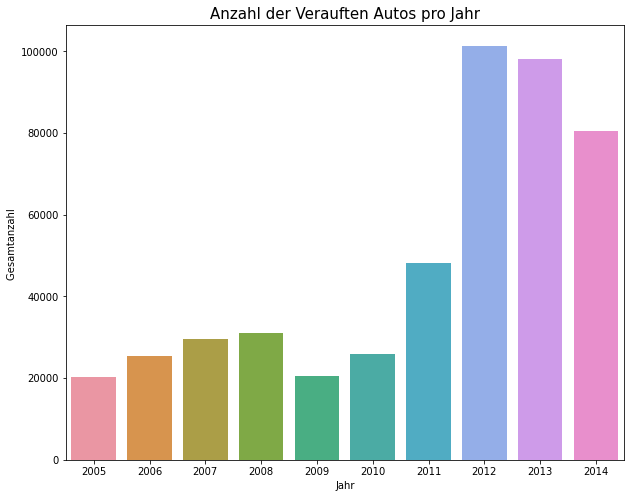

In [47]:
plt.figure(figsize=(10,8))
sns.barplot(x='year',y='total_units',data=sale_model,palette=sns.set_palette('Set1'))
plt.title('Anzahl der Verauften Autos pro Jahr',fontsize=15)
plt.xlabel('Jahr',fontsize=10)
plt.ylabel('Gesamtanzahl ',fontsize=10)


Aus dem Diagramm geht hervor, dass Autos der Marke 2012 die meisten Auktionen hatten, gefolgt von 2013 und 2014. Oldtimer verkauften sich also nicht so gut, und die Leute interessierten sich mehr für die neuesten Marken.Interessant!

Mal sehen, welches Modell beim durchschnittlichen Verkaufspreis an der Spitze steht.


In [35]:
sale_year=df.groupby('year')['sellingprice'].mean().sort_values(ascending=False)[:10].reset_index()

Text(0, 0.5, 'Verkaufspreis')

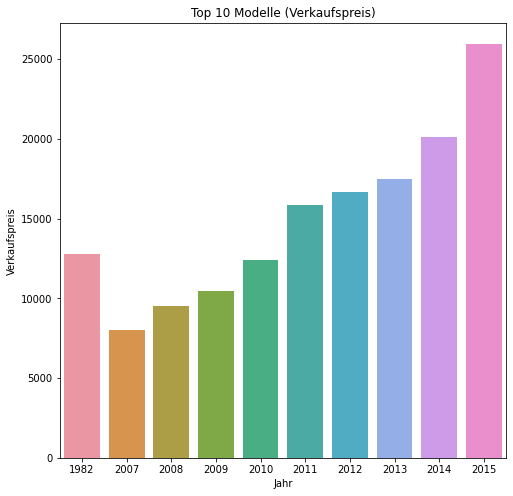

In [48]:
plt.figure(figsize=(8,8))
sns.barplot(x='year',y='sellingprice',data=sale_year)
plt.title('Top 10 Modelle (Verkaufspreis)')
plt.xlabel('Jahr')
plt.ylabel('Verkaufspreis')

Das Modell 2012 mag die höchsten Auktionen nach Gesamteinheiten erzielt haben, aber wenn es um den durchschnittlichen Verkaufspreis geht, liegt das Modell 2015 an der Spitze, gefolgt vom Modell 2014.Eine weitere interessante Sache ist der Preis des Modells 1982, das die Top 10 der Verkaufspreise dominiert.

Die bloße Betrachtung des Modelljahrs könnte keine wertvollen Informationen liefern, da es mehrere Marken für das Modelljahr gibt. Lassen Sie uns das Jahr und die Markenspalte zusammenfassen und diese Analyse erneut betrachten.


In [37]:
df['year_make']=df['year'].astype('str')+'_'+df['make']

In [38]:
df['year_make'].value_counts().reset_index().rename(columns={'year_make':'units','index':'year_make'})[:10]

,year_make,units
0,2013_Ford,22332
1,2014_Ford,19497
2,2012_Nissan,16879
3,2012_Ford,15839
4,2013_Nissan,11726
5,2013_Chevrolet,10904
6,2014_Chevrolet,9349
7,2012_Honda,8684
8,2013_Hyundai,7882
9,2011_Ford,7704


In [39]:
sale_make=df.groupby('year_make')['sellingprice'].mean().sort_values(ascending=False)[:10].reset_index()
units_make=df['year_make'].value_counts().reset_index().rename(columns={'year_make':'units','index':'year_make'})[:10]

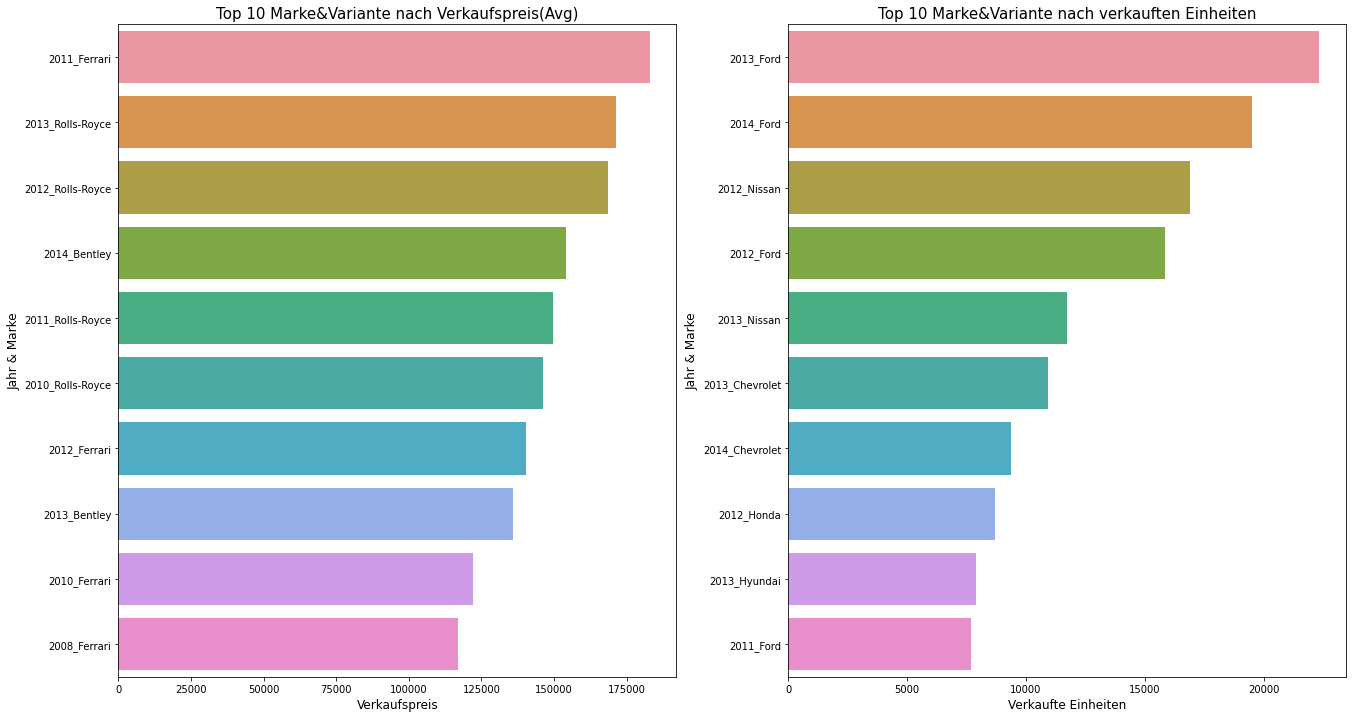

In [49]:
plt.figure(figsize=(22,12))

plt.subplot(1,2,1)

a=sns.barplot(x='sellingprice',y='year_make',data=sale_make)
a.set_title('Top 10 Marke&Variante nach Verkaufspreis(Avg)',fontsize=15)
a.set_ylabel('Jahr & Marke',fontsize=12)
a.set_xlabel('Verkaufspreis',fontsize=12)

plt.subplot(1,2,2)
b=sns.barplot(x='units',y='year_make',data=units_make)
b.set_title('Top 10 Marke&Variante nach verkauften Einheiten',fontsize=15)
b.set_ylabel('Jahr & Marke',fontsize=12)
b.set_xlabel('Verkaufte Einheiten',fontsize=12)


plt.subplots_adjust(hspace=0.45)


- Wenn es um Modelle mit einem höheren Verkaufspreis geht, dominieren Ferraris, Rolls Royce und Bentleys die Liste. Nicht überraschend.
- Bei den insgesamt verkauften Einheiten dominieren Nissan, Ford, Hyundai und Chevrolet die Liste.


# Schlussfolgerung:

In dieser Analyse habe ich eine explorative Analyse des Autoauktionsdatensatzes durchgeführt - kurz gesagt habe ich gesehen, wie die Verteilung des Verkaufspreises aussieht, wie Typ und Modell der verkauften Autos aussehen und wie jeder der Parameter wie Kilometerstand und Getriebe den Wert des Verkaufspreises beeinflusst.
